In [32]:
%matplotlib inline
import contextily as cx
import seaborn as sns
import pandas as pd
from pysal.lib import examples
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### 1. Datos de NYC

- Crea una matriz de contigüidad usando el criterio de Reina
- Con el poligono con ID 142 (central Park)
    - ¿Cuántos vecinos tiene?
    - Realiza un zoom a sus vecinos
- Crea una matriz de pesos por bloque, donde cada elemento sea vecino de acuerdo al "vecindario" al que pertenece, para esto usa la columna borocode.
- Compara el número de vecinos de acuerdo a estas dos matrices, ¿Cuál tiene más? ¿Por qué?

In [4]:
# LDescarga la información de ejemplo de la librería pysal
nyc_data = examples.load_example("NYC Socio-Demographics")
# Imprime las rutas de los archivos de ejemplo para poder acceder a ellos
nyc_data.get_file_list()

['C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.dbf',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.prj',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.shp',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.shx',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.dbf',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.prj',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.shp',
 'C:\\Users\\aloac\\pysal_data\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.shx']

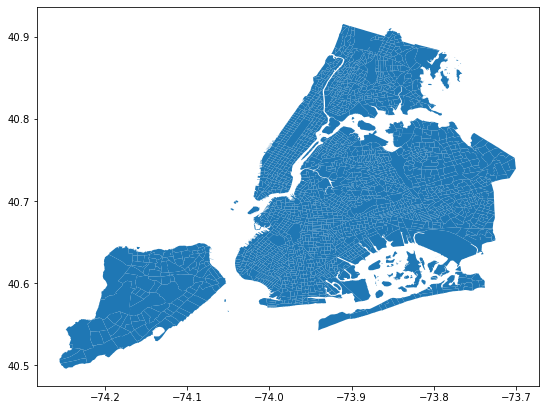

In [6]:
# Cargamos la información
nyc = gpd.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))
# Visualizamos
nyc.plot(figsize=(9, 9))

In [5]:
nyc.head()

,UNEMP_RATE,cartodb_id,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,...,geo_geoid,shape_leng,shape_area,ct2010,boroct2010,borocode,tractid,popdty,geo_fips,geometry
0,0.000000,1,0,0,0,0,0,0,0,0,...,08000US360614491951000000100,11023.047911,1.844421e+06,100.0,1000100.0,1.0,1.00,0.00,3.606140e+20,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,0.081705,2,228,353,47,694,0,92,2773,2351,...,08000US360614491951000000201,4748.703641,9.716282e+05,201.0,1000201.0,1.0,2.01,79619.05,3.606140e+20,"POLYGON ((-73.98450 40.70951, -73.98655 40.709..."
2,0.170603,3,658,1577,198,2589,36,549,8339,6878,...,08000US360614491951000000202,8568.208357,3.315121e+06,202.0,1000202.0,1.0,2.02,72326.46,3.606140e+20,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ..."
3,0.000000,4,0,0,0,0,0,0,0,0,...,08000US360614491951000000500,32407.899284,9.081808e+06,500.0,1000500.0,1.0,5.00,0.00,3.606140e+20,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,0.088037,5,736,1382,194,2953,19,379,10760,8867,...,08000US360614491951000000600,6973.204078,2.583270e+06,600.0,1000600.0,1.0,6.00,109785.00,3.606140e+20,"POLYGON ((-73.99022 40.71440, -73.98934 40.714..."


In [7]:
# Creamos la variable que contendra la matriz de pesos
w_queen = weights.Queen.from_dataframe(nyc)
# Visualizamos
w_queen

E:\Anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 0, 626, 2165.
  warnings.warn(message)


In [8]:
# Obtenemos el número de vecinos de cada uno de los poligonos
queen_card = pd.Series(w_queen.cardinalities)
# Visualizamos el promedio de vecinos
w_queen.mean_neighbors

6.186518928901201

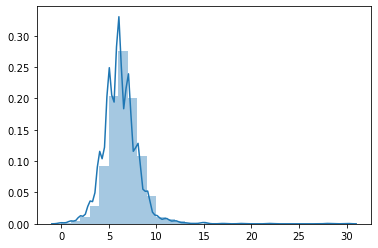

In [9]:
# Mostramos la distribución de la contigüidad
sns.distplot(queen_card, bins=30)

In [10]:
# Identificamos los vecinos del poligono de interes
w_queen.neighbors[142]

[192,
 130,
 195,
 199,
 137,
 204,
 141,
 145,
 151,
 152,
 153,
 156,
 222,
 161,
 165,
 166,
 167,
 171,
 187,
 110,
 111,
 174,
 175,
 114,
 179,
 180,
 181,
 183,
 123,
 191]

In [11]:
# Número de vecinos
w_queen.cardinalities[142]

30

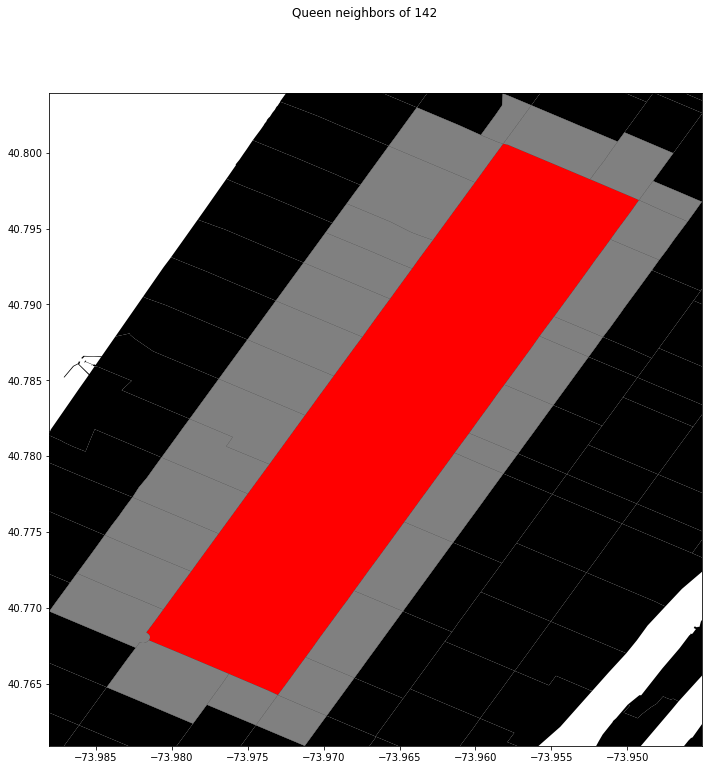

In [26]:
# SParametros de entradad
f, ax = plt.subplots(1, figsize=(12, 12))
# Poligonos de fondo
nyc.plot(ax=ax, facecolor='k', linewidth=0.1)
# Seleccionamos el poligonos de acercamiento
# Definimos el id y la geometría para el acercamiento
#      (`geometry`) within brackets!!!
focus = nyc.loc[[142], ['geometry']]
# Mostramos el poligono de ínteres
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Mostramos los vecinos
neis = nyc.loc[w_queen[142], :]
neis.plot(ax=ax, facecolor='grey', linewidth=0)
# Titulo
f.suptitle("Queen neighbors of 142")
# Ajustamos el zoom
e, s, w, n = neis.total_bounds # Obtenemos los límites de la variable que contiene a los vecinos
ax.set_xlim(e, w)
ax.set_ylim(s, n)
plt.show()

In [18]:
# Creamos la matriz de pesos por bloque, esto de acuerdo a la columna que contiene la información del distrito al que pertenece
w_block = weights.block_weights(nyc['borocode'])
w_block

E:\Anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [20]:
# Asignamos el ID de NYC a la matriz de bloques
w_block.remap_ids(nyc.index)

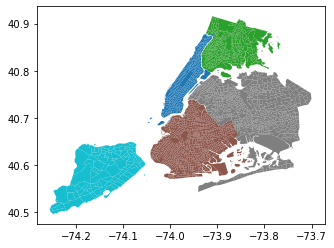

In [23]:
nyc.plot(column='borocode', categorical=True);

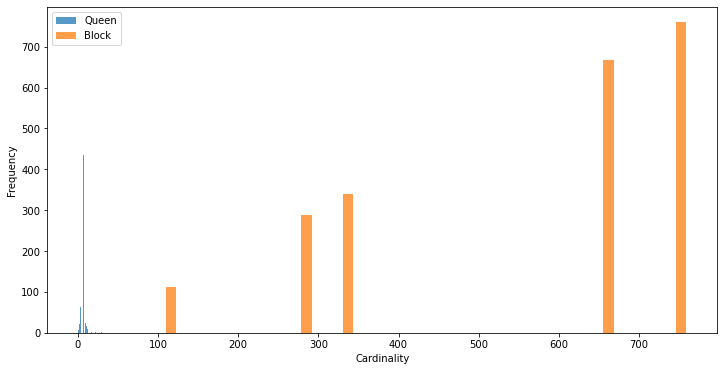

In [25]:
# graficamos la distribución de las dos matrices de pesos
# Creamos la ´grafica en la que se mostrara la distribución de la caontigüidad de reina
ax = pd.Series(w_queen.cardinalities).plot.hist(bins=50, 
                                                    alpha=0.75, 
                                                    label="Queen",
                                                    figsize=(12, 6)
                                                   )
# Agregamos la contigüidad de bloque
pd.Series(w_block.cardinalities).plot.hist(bins=50, 
                                               alpha=0.75, 
                                               ax=ax, 
                                               label="Block"
                                              )
ax.set_xlabel("Cardinality")
ax.legend();

### 2. Ciudades japonesas
En esta tarea, se realizara una matriz de pesos espaciales basada en la Distancia.
- Genera una matriz de pesos con los 5 vecinos más cercanos
- Genera una matriz de pesos espaciales con un umbral de distancia de 100km
- compara los dos en terminos del número promedio de vecinos. 
- ¿Cuáles son las principales diferencias? Cuál de las dos es preferible?

In [28]:
jp_cities = gpd.read_file("http://www.oecd.org/cfe/regionaldevelopment/Japan.zip")
jp_cities.head()

,fuacode_si,fuaname,fuaname_en,class_code,iso3,name,geometry
0,JPN19,Kagoshima,Kagoshima,3.0,JPN,Japan,"MULTIPOLYGON Z (((130.67888 31.62931 0.00000, ..."
1,JPN20,Himeji,Himeji,3.0,JPN,Japan,"MULTIPOLYGON Z (((134.51537 34.65958 0.00000, ..."
2,JPN50,Hitachi,Hitachi,3.0,JPN,Japan,"POLYGON Z ((140.58715 36.94447 0.00000, 140.61..."
3,JPN08,Hiroshima,Hiroshima,3.0,JPN,Japan,"MULTIPOLYGON Z (((132.29648 34.19932 0.00000, ..."
4,JPN03,Toyota,Toyota,4.0,JPN,Japan,"MULTIPOLYGON Z (((137.04096 34.73242 0.00000, ..."


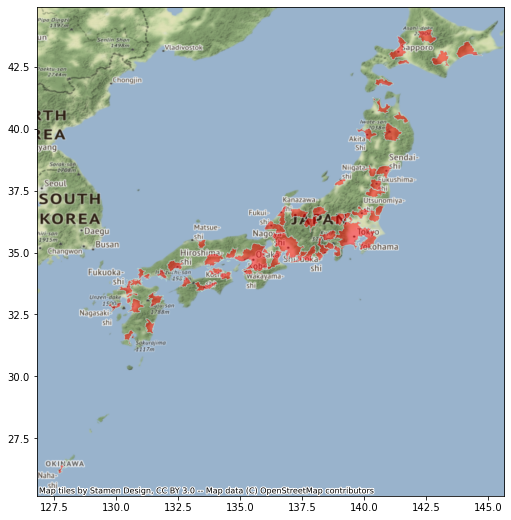

In [45]:
ax = jp_cities.plot( edgecolor='#B9EBE3',color="red", alpha=0.5, figsize=(9, 9))
cx.add_basemap(ax, crs=jp_cities.crs)

In [35]:
jp_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
jp = jp_cities.to_crs(epsg=2459)
jp.crs

<Projected CRS: EPSG:2459>
Name: JGD2000 / Japan Plane Rectangular CS XVII
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - zone XVII
- bounds: (131.12, 24.4, 131.38, 26.01)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone XVII
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

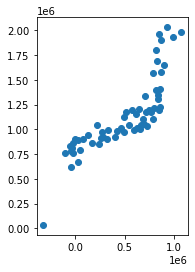

In [39]:
jp.geometry = jp.geometry.centroid
jp.plot()

In [40]:
knn5 = weights.KNN.from_dataframe(jp, k=5)
knn5

In [42]:
# Promedio de número de vecinos
knn5.mean_neighbors

5.0

In [43]:
# Matriz de distancia con un umbral de 100 000km 
w_dist1kmB = weights.DistanceBand.from_dataframe(jp, 100000)

In [44]:
w_dist1kmB.mean_neighbors

3.4098360655737703

La diferencia radical entre estas dos matrices de pesos, es que KNN obligatoriamente busca los 5 vecinos más proximos, esto sin importar a que distancia se encuentren, por lo que este número se mantendra constante sin importar que suceda, mientras que la matriz generada por el umbral de distancia se encuentra acotado por una distancia de 100 km, por lo que hay entidades que pueden encontrarse aisladas significando en un  menor número de vecinos

In [36]:
nyc.loc[nyc['cartodb_id'] == 142]

,UNEMP_RATE,cartodb_id,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,...,geo_geoid,shape_leng,shape_area,ct2010,boroct2010,borocode,tractid,popdty,geo_fips,geometry
141,0.02867,142,12,697,12,97,413,58,4184,3192,...,08000US360614491951000014200,5821.704944,1.927688e+06,14200.0,1014200.0,1.0,142.0,60543.89,3.606140e+20,"POLYGON ((-73.95816 40.77886, -73.95863 40.778..."
